<a href="https://colab.research.google.com/github/Heyitsmeramya/CrudGenV3/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib.pyplot import figure
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Data/hcvdat.csv')

In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,Hepatitis A,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,Hepatitis A,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,Hepatitis A,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,Hepatitis A,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,Hepatitis A,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [ ]:
df['Category'].value_counts()

,count
Category,
Hepatitis A,533
Hepatitis B,82


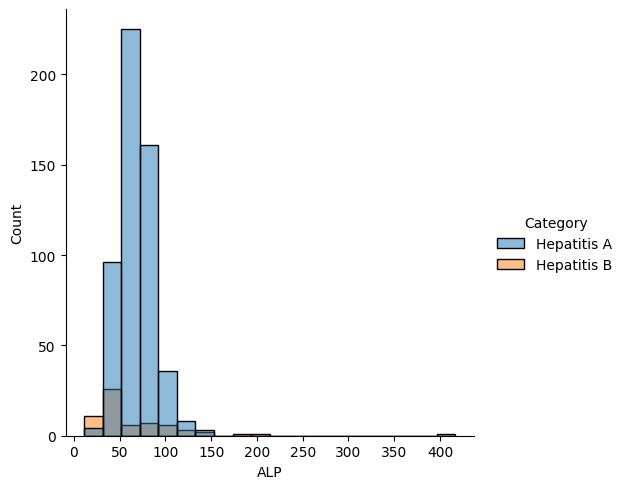

In [ ]:
sns.displot(data = df , x = 'ALP',  bins=20, hue = 'Category')

<Axes: xlabel='Age', ylabel='Count'>

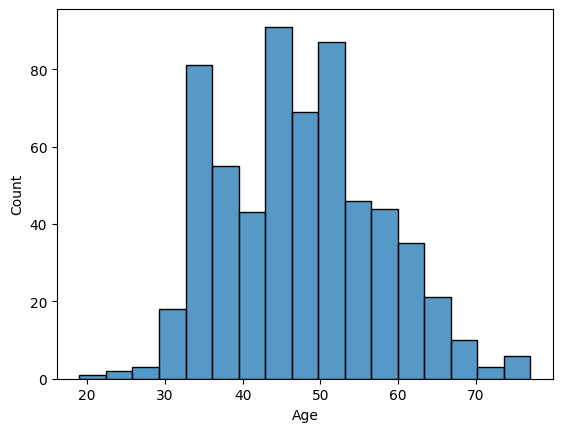

In [ ]:
sns.histplot(df['Age'])

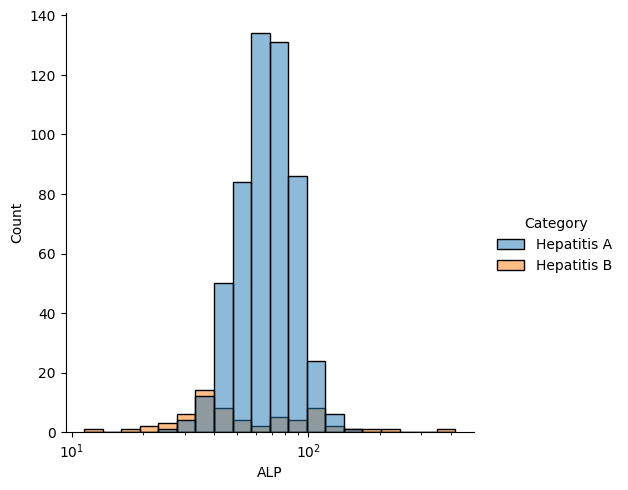

In [ ]:
sns.displot(data = df , x = 'ALP',  bins=20, hue = 'Category' , log_scale=True)

<Axes: >

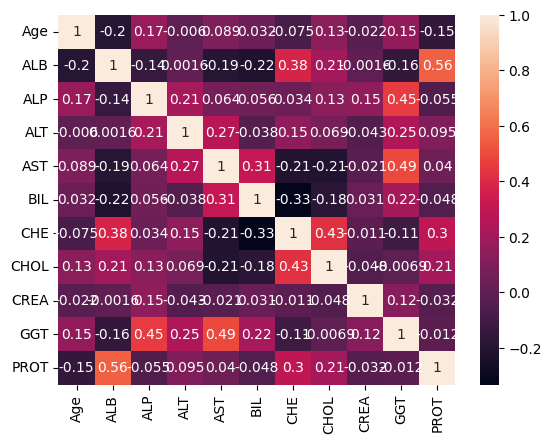

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True)

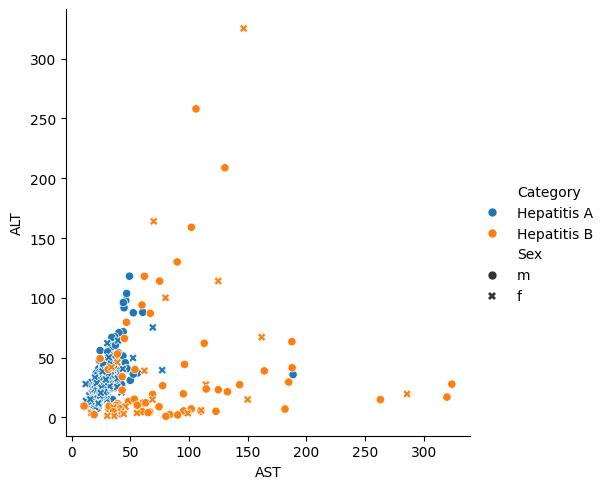

In [ ]:
sns.relplot(x="AST", y="ALT", hue="Category", style="Sex", data=df)

<Figure size 2000x2000 with 0 Axes>

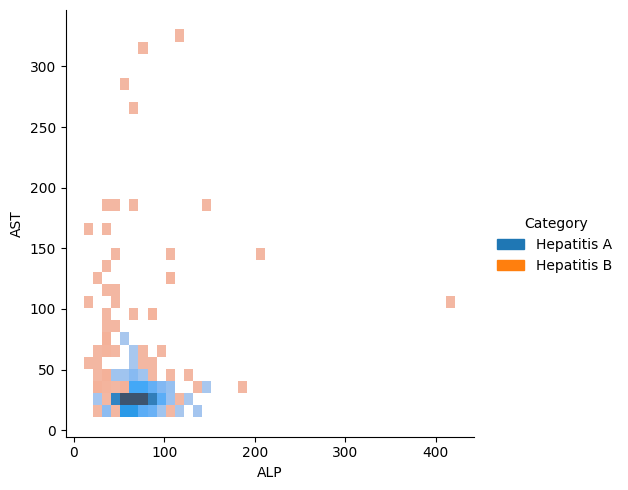

In [ ]:
fig = plt.figure(figsize= (20,20))

sns.displot(data = df , x = 'ALP', y = 'AST' ,  hue = 'Category' , binwidth=(10, 10))

<Figure size 2000x2000 with 0 Axes>

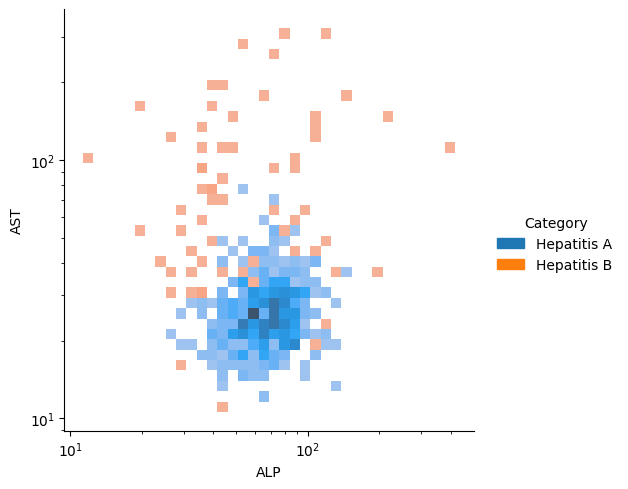

In [ ]:
fig = plt.figure(figsize= (20,20))

sns.displot(data = df , x = 'ALP', y = 'AST' ,  hue = 'Category' , log_scale=(True, True))

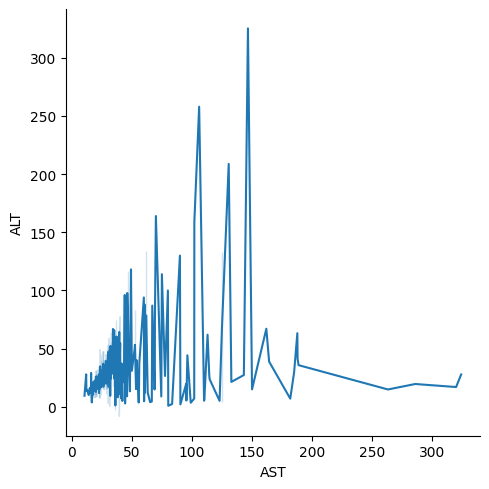

In [ ]:
sns.relplot(x="AST", y="ALT", kind="line", ci="sd", data=df)

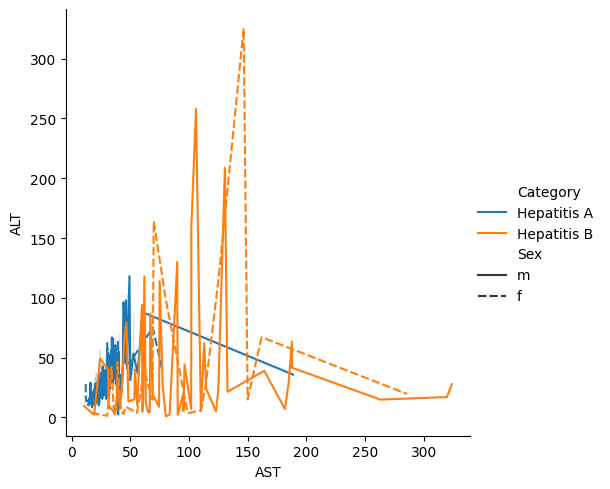

In [ ]:
sns.relplot(x="AST", y="ALT",
            hue="Category", style="Sex", kind="line", data=df)

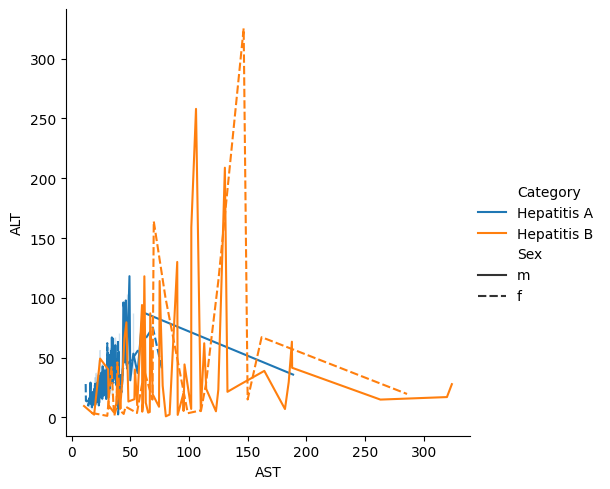

In [ ]:
sns.relplot(x="AST", y="ALT",
            hue="Category", style="Sex", kind="line", data=df)

In [ ]:
df.nunique()

,0
Category,2
Age,49
Sex,2
ALB,189
ALP,414
ALT,341
AST,297
BIL,188
CHE,407
CHOL,313


In [ ]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
Value_list = df['Category'].unique()

for x in range(len(Value_list)):
    df.Category[df['Category'] == Value_list[x]] = x

df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
Value_list = df['Sex'].unique()

for x in range(len(Value_list)):
    df.Sex[df['Sex'] == Value_list[x]] = x

df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df = df.fillna(0)
#df.head()

In [ ]:
df_copy = df.copy()

In [ ]:
column_list = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CREA', 'GGT', 'PROT']

for column in column_list:
    Nmax = int(df[column].max())
    Nmin = int(df[ column].min())

    labels = []

    #bin_lenght = max(df[column].max() , 2 )
    bin_lenght = min(df[column].max() - df[column].min() , 10)
    #print(bin_lenght , column)

    for i in range(Nmin, Nmax, bin_lenght):
        labels.append(i)

    labels = labels[:-1]

    df_copy[column] = pd.cut(df[column], bins =  range(Nmin, Nmax , bin_lenght),  right=False, labels=labels)

In [ ]:
column_list = ['CHE','CHOL']

for column in column_list:
    Nmax = int(df[column].max())
    Nmin = int(df[ column].min())

    labels = []

    #bin_lenght = max(df[column].max() , 2 )
    bin_lenght = min(df[column].max() - df[column].min() , 4)
    #print(bin_lenght , column)

    for i in range(Nmin, Nmax, bin_lenght):
        labels.append(i)

    labels = labels[:-1]

    df_copy[column] = pd.cut(df[column], bins =  range(Nmin, Nmax , bin_lenght),  right=False, labels=labels)

df_copy.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,29,0,30,50,0,20,0,5,0,98,4,60
1,0,29,0,30,70,10,20,0,9,4,68,14,70
2,0,29,0,40,70,30,50,0,5,4,78,24,70
3,0,29,0,40,50,30,20,10,5,4,78,24,70
4,0,29,0,30,70,30,20,0,9,4,68,24,60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 62.6 KB


In [ ]:
X = df.drop('Category',axis=1)#INDEPENDENT VRIABLE
y =df['Category'] #DEPENDENT VRIABLE

In [ ]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', y.shape)
print('Resample dataset shape', y_smote.shape)

Original dataset shape (615,)
Resample dataset shape (1066,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.25, random_state = 0)

In [ ]:
#intialize the model we want to use
classifier = LogisticRegression(C=0.01, penalty='l1',solver='liblinear')
#build LR model
model = classifier.fit(X_train, y_train)

In [ ]:
#predicting on the remaining portion of our X, X_test
y_pred = model.predict(X_test)

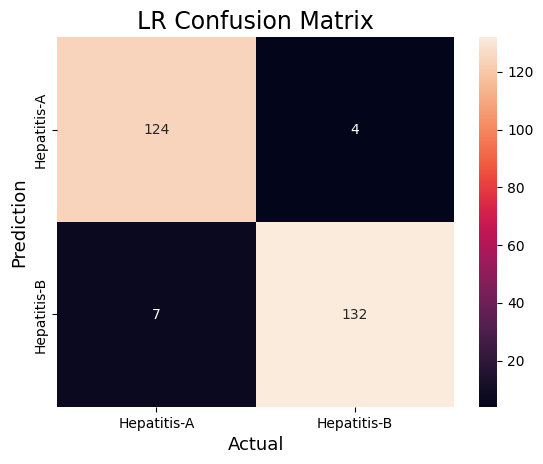

In [ ]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns

categories = ['Hepatitis-A', 'Hepatitis-B']
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=categories,
            yticklabels=categories)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('LR Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))
target_names = ['Hepatitis-A', 'Hepatitis-B']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy :  0.9588014981273408
              precision    recall  f1-score   support

 Hepatitis-A       0.95      0.97      0.96       128
 Hepatitis-B       0.97      0.95      0.96       139

    accuracy                           0.96       267
   macro avg       0.96      0.96      0.96       267
weighted avg       0.96      0.96      0.96       267



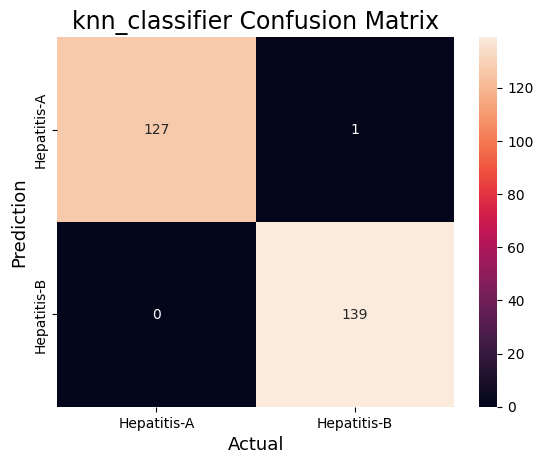

ACCURACY OF KNN MODEL:  0.9962546816479401
              precision    recall  f1-score   support

 Hepatitis-A       1.00      0.99      1.00       128
 Hepatitis-B       0.99      1.00      1.00       139

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



In [ ]:

# Initialize the k-NN classifier with k=3
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)


# performing predictions on the test dataset
y_pred = knn_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
import seaborn as sns

categories = ['Hepatitis-A', 'Hepatitis-B']
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=categories,
            yticklabels=categories)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('knn_classifier Confusion Matrix',fontsize=17)
plt.show()


    # using metrics module for accuracy calculation
print("ACCURACY OF KNN MODEL: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

Number of unique classes: 2
Unique classes: [0 1]
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 422ms/step - accuracy: 0.5369 - loss: 4.0197 - val_accuracy: 0.8125 - val_loss: 3.6225 - learning_rate: 1.0000e-04
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 333ms/step - accuracy: 0.7635 - loss: 3.4575 - val_accuracy: 0.5000 - val_loss: 3.6323 - learning_rate: 1.0000e-04
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 392ms/step - accuracy: 0.8478 - loss: 3.3210 - val_accuracy: 0.4812 - val_loss: 3.7180 - learning_rate: 1.0000e-04
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 360ms/step - accuracy: 0.8946 - loss: 3.2038 - val_accuracy: 0.4812 - val_loss: 3.7770 - learning_rate: 1.0000e-04
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 333ms/step - accuracy: 0.8817 - loss: 3.2306 - val_accuracy: 0.4812 - val_loss: 3.7975 - learning_rate: 1.0000e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 332ms/step - accuracy: 0.9191 - loss: 3.1511 - val_accuracy: 0.4812 - val_loss: 3.8431 - learning_rate: 1.0000e-04
Epoc

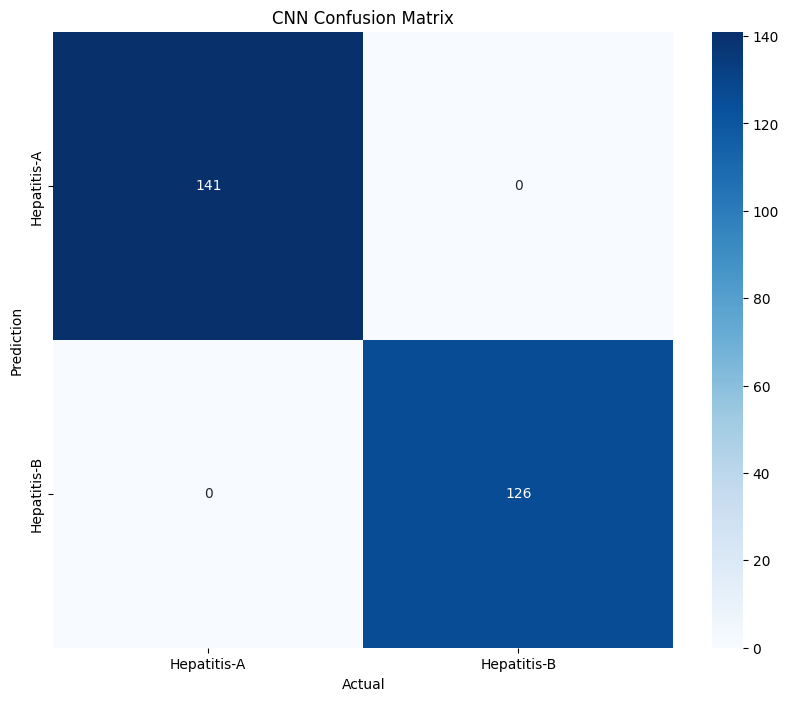


ACCURACY OF CNN MODEL:  1.0

Classification Report:
              precision    recall  f1-score   support

 Hepatitis-A       1.00      1.00      1.00       141
 Hepatitis-B       1.00      1.00      1.00       126

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



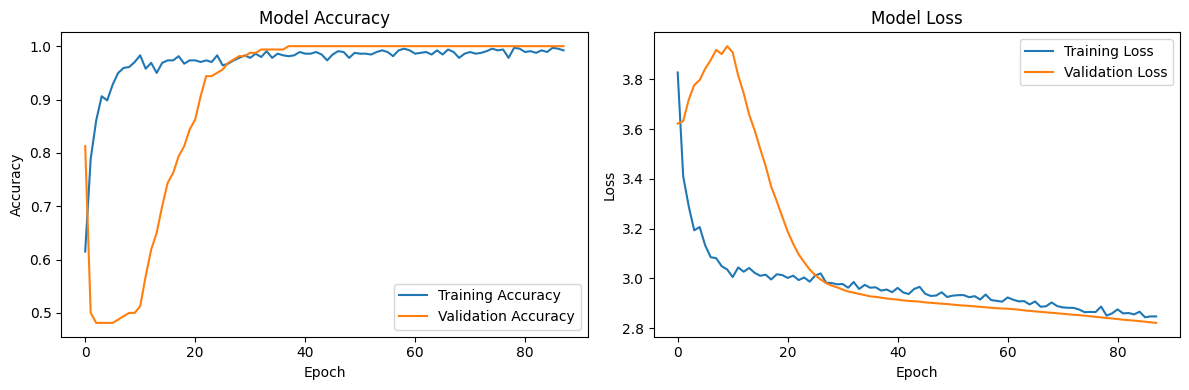

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('Data/hcvdat.csv')

# Encode categorical variables
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Sex'] = le.fit_transform(df['Sex'])

# Ensure 'Category' is integer type
df['Category'] = df['Category'].astype(int)

# Fill missing values
df = df.fillna(0)

# Scale numerical features
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('Category')  # Exclude target column
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Split features and target
X = df.drop('Category', axis=1)
y = df['Category']

# Check the number of classes
n_classes = len(np.unique(y))
print(f"Number of unique classes: {n_classes}")
print(f"Unique classes: {np.unique(y)}")

# Convert target to numpy array
y = y.values.astype(int)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

# Reshape data for CNN
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert labels to categorical
y_train_cnn = to_categorical(y_train, num_classes=n_classes)
y_test_cnn = to_categorical(y_test, num_classes=n_classes)

# Define CNN model
cnn_model = Sequential([
    Conv1D(filters=512, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Conv1D(filters=1024, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Conv1D(filters=512, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dense(n_classes, activation='softmax')
])

# Compile model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=50,
    restore_best_weights=True,
    min_delta=0.0001
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=0.0000001,
    min_delta=0.0001
)

# Train model
history = cnn_model.fit(
    X_train_cnn,
    y_train_cnn,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate model
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred_cnn, axis=1)
y_test_classes = y_test

# Confusion Matrix
cm_cnn = confusion_matrix(y_test_classes, y_pred_classes)
categories = ['Hepatitis-A', 'Hepatitis-B']  # Replace with actual category names

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues')
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('CNN Confusion Matrix')
plt.show()

# Print accuracy and classification report
print("\nACCURACY OF CNN MODEL: ", accuracy_score(y_test_classes, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=categories))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Model Accuracy Comparison:
------------------------
                     Accuracy
Algorithm                    
Logistic Regression     0.958
K-Nearest Neighbors     0.996
CNN                     1.000


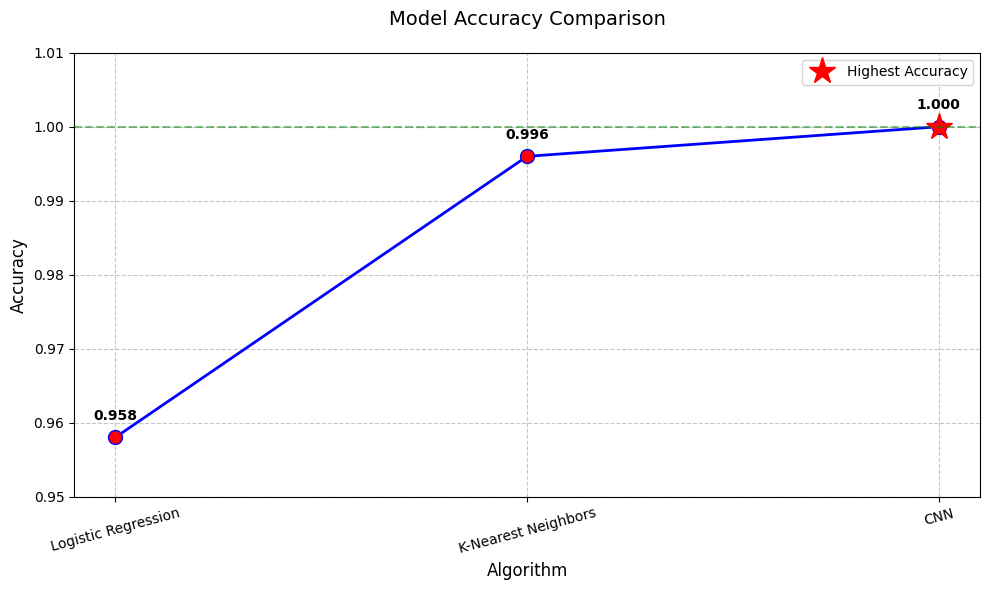

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary of model accuracies
accuracies = {
    'Logistic Regression': 0.958,
    'K-Nearest Neighbors': 0.996,
    'CNN': 1.0
}

# Convert to DataFrame for better visualization
comparison_df = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracy'])
comparison_df.index.name = 'Algorithm'

# Sort by accuracy in ascending order (lowest to highest)
comparison_df = comparison_df.sort_values('Accuracy', ascending=True)

# Display the table
print("\nModel Accuracy Comparison:")
print("------------------------")
print(comparison_df)

# Create a line plot
plt.figure(figsize=(10, 6))

# Create line plot with markers
plt.plot(comparison_df.index, comparison_df['Accuracy'],
         marker='o',  # Add markers at data points
         linewidth=2,  # Line thickness
         markersize=10,  # Marker size
         color='blue',  # Line color
         markerfacecolor='red')  # Marker color

# Add value labels above points
for i, v in enumerate(comparison_df['Accuracy']):
    plt.text(i, v + 0.002, f'{v:.3f}',
             ha='center', va='bottom',
             fontweight='bold')

# Customize plot
plt.title('Model Accuracy Comparison', fontsize=14, pad=20)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0.95, 1.01)  # Adjusted y-axis limits

# Rotate x-axis labels for better readability
plt.xticks(range(len(comparison_df.index)), comparison_df.index, rotation=15)

# Highlight highest accuracy
max_acc_idx = comparison_df['Accuracy'].values.argmax()
plt.plot(max_acc_idx, comparison_df['Accuracy'].max(),
         'r*',  # Red star for highest point
         markersize=20,
         label='Highest Accuracy')

# Add legend
plt.legend()

# Add horizontal line at perfect accuracy
plt.axhline(y=1.0, color='green', linestyle='--', alpha=0.5, label='Perfect Accuracy')

plt.tight_layout()
plt.show()